<a href="https://colab.research.google.com/github/Arhin-Eben/Computer_Vision_Course/blob/master/CSCD_608_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSIGNMENT 1 – FILTERING (20%)**

**1.	Add Noise to some images (salt n pepper noise), Gaussian noise**

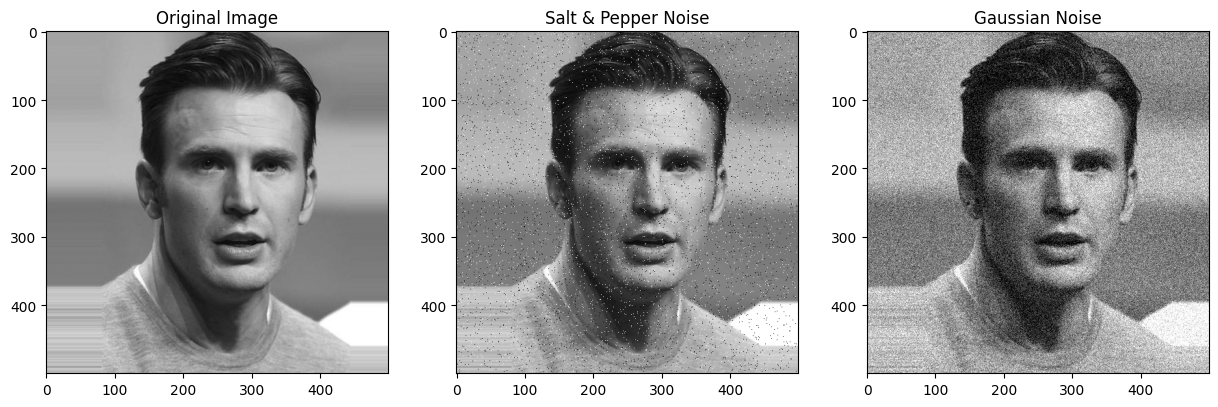

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_salt_pepper_noise(image, salt_vs_pepper=0.5, amount=0.04):
  #Adding salt & Pepper noise to an image
  noisy_image = np.copy(image)
  num_salt = np.ceil(amount * image.size * salt_vs_pepper)
  coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
  noisy_image[coords[0], coords[1]] = 255 #Salt

  num_pepper = np.ceil(amount * image.size * (1.0 - salt_vs_pepper))
  coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
  noisy_image[coords[0], coords[1]] = 0 #Pepper
  return noisy_image

def add_gaussian_noise(image, mean=0, var=1000):
  #Adds Gaussian noise to an image
  sigma = var ** 0.5
  gaussian =np.random.normal(mean, sigma, image.shape)
  noisy_image = image + gaussian
  noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8) #clipping values to 0
  return noisy_image

  # --- Load an image ---
try:
    img_path = '/content/male_000281.jpg'
    original_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if original_image is None:
        raise FileNotFoundError(f"Image not found at {img_path}")

     # Reducing the image size
    if max(original_image.shape) > 500:
        scale_percent = 500 / max(original_image.shape)
        width = int(original_image.shape[1] * scale_percent)
        height = int(original_image.shape[0] * scale_percent)
        dim = (width, height)
        original_image = cv2.resize(original_image, dim, interpolation=cv2.INTER_AREA)

    # --- Add Noise ---
    salt_pepper_noisy_image = add_salt_pepper_noise(original_image, amount=0.03) # 3% noise
    gaussian_noisy_image = add_gaussian_noise(original_image, mean=0, var=900) # Variance 900

    # Display noisy images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1), plt.imshow(original_image, cmap='gray'), plt.title('Original Image')
    plt.subplot(1, 3, 2), plt.imshow(salt_pepper_noisy_image, cmap='gray'), plt.title('Salt & Pepper Noise')
    plt.subplot(1, 3, 3), plt.imshow(gaussian_noisy_image, cmap='gray'), plt.title('Gaussian Noise')
    plt.show()

except FileNotFoundError as e:
    print(e)
    print("Please replace '/content/male_000281.jpg' with a valid image path.")
except Exception as e:
    print(f"An error occurred: {e}")


**2.	Remove the noise using different filters**

Applying filters to Salt & Pepper Noisy Image...


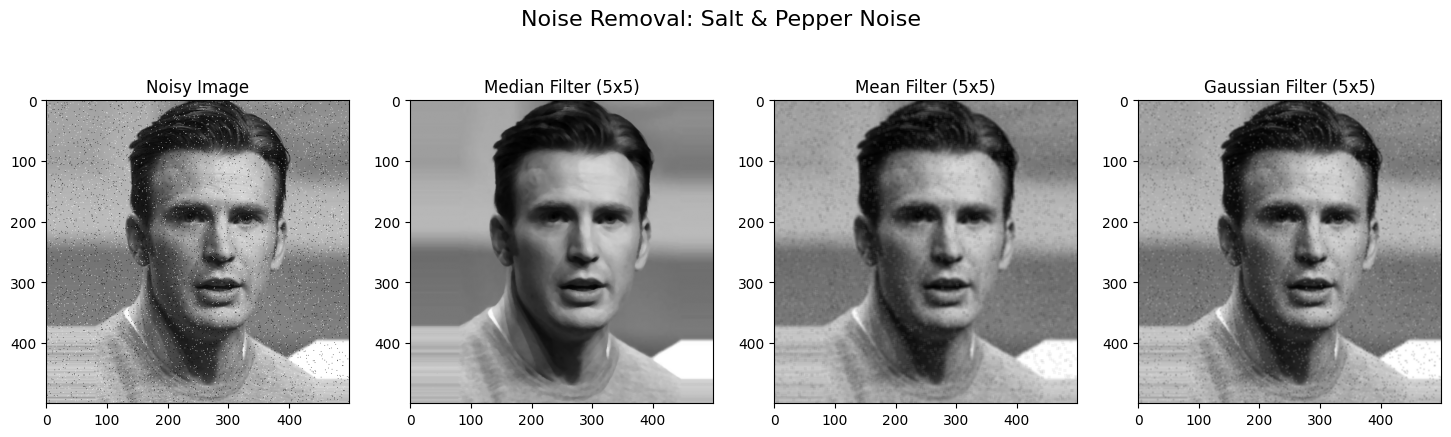


Applying filters to Gaussian Noisy Image...


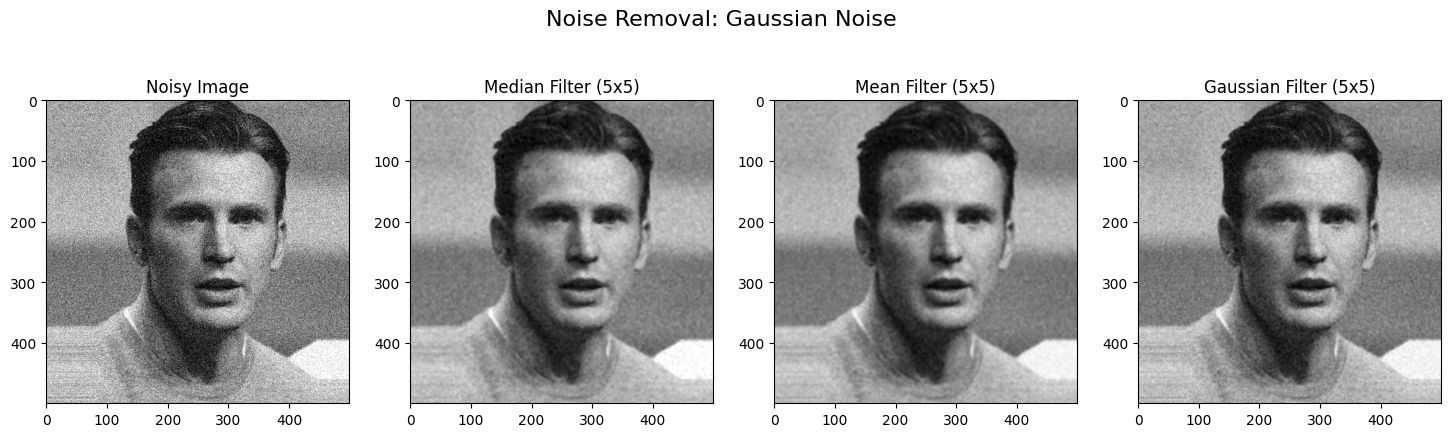

In [ ]:

if 'salt_pepper_noisy_image' in locals() and 'gaussian_noisy_image' in locals():
    #Filters for Salt & Pepper Noise
    print("Applying filters to Salt & Pepper Noisy Image...")
    sp_median_filtered = cv2.medianBlur(salt_pepper_noisy_image, 5) # Median filter applied
    sp_mean_filtered = cv2.blur(salt_pepper_noisy_image, (5, 5))
    sp_gaussian_filtered = cv2.GaussianBlur(salt_pepper_noisy_image, (5, 5), 0)

    plt.figure(figsize=(18, 5))
    plt.suptitle('Noise Removal: Salt & Pepper Noise', fontsize=16)
    plt.subplot(1, 4, 1), plt.imshow(salt_pepper_noisy_image, cmap='gray'), plt.title('Noisy Image')
    plt.subplot(1, 4, 2), plt.imshow(sp_median_filtered, cmap='gray'), plt.title('Median Filter (5x5)')
    plt.subplot(1, 4, 3), plt.imshow(sp_mean_filtered, cmap='gray'), plt.title('Mean Filter (5x5)')
    plt.subplot(1, 4, 4), plt.imshow(sp_gaussian_filtered, cmap='gray'), plt.title('Gaussian Filter (5x5)')
    plt.show()

    #Filters for Gaussian Noise
    print("\nApplying filters to Gaussian Noisy Image...")
    gauss_median_filtered = cv2.medianBlur(gaussian_noisy_image, 5)
    gauss_mean_filtered = cv2.blur(gaussian_noisy_image, (5, 5))
    gauss_gaussian_filtered = cv2.GaussianBlur(gaussian_noisy_image, (5, 5), 0) # Gaussian is applied

    plt.figure(figsize=(18, 5))
    plt.suptitle('Noise Removal: Gaussian Noise', fontsize=16)
    plt.subplot(1, 4, 1), plt.imshow(gaussian_noisy_image, cmap='gray'), plt.title('Noisy Image')
    plt.subplot(1, 4, 2), plt.imshow(gauss_median_filtered, cmap='gray'), plt.title('Median Filter (5x5)')
    plt.subplot(1, 4, 3), plt.imshow(gauss_mean_filtered, cmap='gray'), plt.title('Mean Filter (5x5)')
    plt.subplot(1, 4, 4), plt.imshow(gauss_gaussian_filtered, cmap='gray'), plt.title('Gaussian Filter (5x5)')
    plt.show()
else:
    print("Please run Part 1 first to generate noisy images.")

**3.	Load image ; Detect the edges, using robert, sobel, prewitt, canny, 2nd derivative filters**

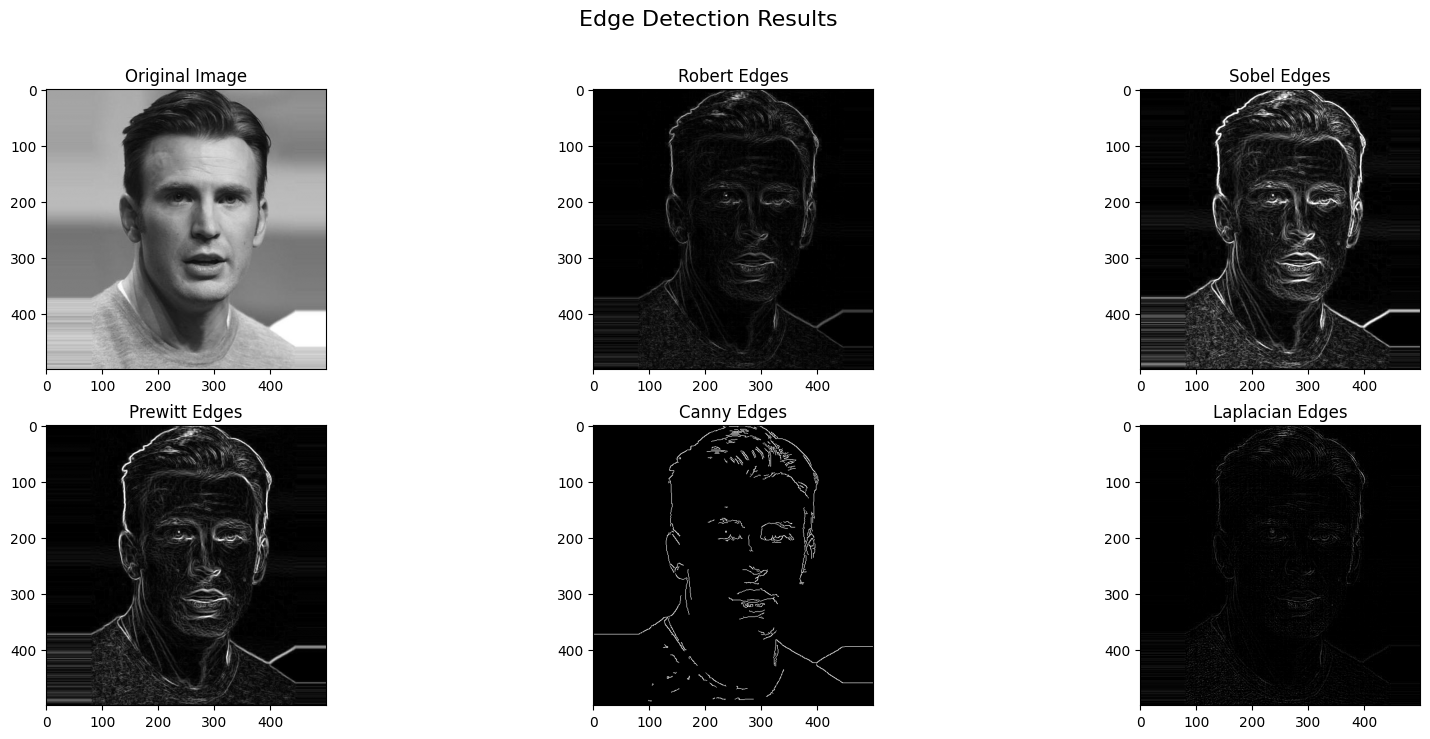

In [ ]:

if 'original_image' in locals():
    #Robert Edge Detector
    # Implementing Robert Cross manually using filter2D
    kernel_roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernel_roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

    roberts_x = cv2.filter2D(original_image, cv2.CV_64F, kernel_roberts_x)
    roberts_y = cv2.filter2D(original_image, cv2.CV_64F, kernel_roberts_y)
    roberts_edges = np.sqrt(roberts_x**2 + roberts_y**2)
    roberts_edges = np.clip(roberts_edges, 0, 255).astype(np.uint8)

    #Sobel Edge Detector
    sobel_x = cv2.Sobel(original_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(original_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel_edges = np.clip(sobel_edges, 0, 255).astype(np.uint8)

    #Prewitt Edge Detector (manual implementation using filter2D)
    kernel_prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
    kernel_prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)

    prewitt_x = cv2.filter2D(original_image, cv2.CV_64F, kernel_prewitt_x)
    prewitt_y = cv2.filter2D(original_image, cv2.CV_64F, kernel_prewitt_y)
    prewitt_edges = np.sqrt(prewitt_x**2 + prewitt_y**2)
    prewitt_edges = np.clip(prewitt_edges, 0, 255).astype(np.uint8)

    #Canny Edge Detector
    # Parameters: image, threshold1, threshold2
    canny_edges = cv2.Canny(original_image, 100, 200)

    #Laplacian (2nd Derivative Filter)
    laplacian_edges = cv2.Laplacian(original_image, cv2.CV_64F)
    laplacian_edges = np.clip(laplacian_edges, 0, 255).astype(np.uint8)

    # Display all edge detection results
    plt.figure(figsize=(20, 8))
    plt.suptitle('Edge Detection Results', fontsize=16)

    plt.subplot(2, 3, 1), plt.imshow(original_image, cmap='gray'), plt.title('Original Image')
    plt.subplot(2, 3, 2), plt.imshow(roberts_edges, cmap='gray'), plt.title('Robert Edges')
    plt.subplot(2, 3, 3), plt.imshow(sobel_edges, cmap='gray'), plt.title('Sobel Edges')
    plt.subplot(2, 3, 4), plt.imshow(prewitt_edges, cmap='gray'), plt.title('Prewitt Edges')
    plt.subplot(2, 3, 5), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Edges')
    plt.subplot(2, 3, 6), plt.imshow(laplacian_edges, cmap='gray'), plt.title('Laplacian Edges')
    plt.show()

else:
    print("Please run Part 1 first to load the original image.")

**Thank you**